In [1]:
import numpy as np
import pandas as pd

Import data

In [2]:
airlines = pd.read_csv("airlines.csv", index_col =0)
airports = pd.read_csv("airports.csv", index_col =0)
planes = pd.read_csv("planes.csv", index_col =0)
weather= pd.read_csv("weather.csv", index_col =0)
flights = pd.read_csv("flights.csv", index_col =0)

# i. Print out the number of rows in each of the five files.

In [3]:

print(airlines.shape[0])
print(airports.shape[0])
print(planes.shape[0])
print(weather.shape[0])
print(flights.shape[0])

16
1458
3322
26130
336776


# ii. Means and standard deviations of inter-arrival times for the top five busiest airports (in terms of highest average number of flights arrived per day) in the list provided

In [4]:
flights.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

In [5]:
flights.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00


Tranform arr_time from integer to pandas timestamp

In [6]:
flights["hour"] = flights["arr_time"]//100

In [7]:
flights["minute"] = flights["arr_time"]%100

In [8]:
flights.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,8.0,30.0,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,8.0,50.0,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,9.0,23.0,2013-01-01 05:00:00


Store arr_time as pandas timestamp into temp

In [9]:
temp = flights[["year","month","day","hour","minute"]]

In [10]:
temp = pd.to_datetime(temp[["year","month","day","hour","minute"]])

In [11]:
temp = temp.to_frame()

In [12]:
temp.columns=["arr_time"]

In [13]:
temp.head(5)

,arr_time
1,2013-01-01 08:30:00
2,2013-01-01 08:50:00
3,2013-01-01 09:23:00
4,2013-01-01 10:04:00
5,2013-01-01 08:12:00


Add destination column to arrival time

In [14]:
temp["dest"] = flights["dest"]

In [15]:
temp.head(5)

,arr_time,dest
1,2013-01-01 08:30:00,IAH
2,2013-01-01 08:50:00,IAH
3,2013-01-01 09:23:00,MIA
4,2013-01-01 10:04:00,BQN
5,2013-01-01 08:12:00,ATL


find most busy airport.(since number of days is constant, there is no different between find top 5 sum or top 5 average)

In [16]:
temp = temp.sort_values(by = ["dest","arr_time"],ascending = True)

In [17]:
flights["dest"].value_counts().sort_values( ascending = False).head(5)

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64

So top 5 busy airports are "ORD","ATL","LAX","BOS","MCO".

remove none top5 data

In [18]:
top5_list = ["ORD","ATL","LAX","BOS","MCO"]

In [19]:
mask = temp["dest"].isin(top5_list)

In [20]:
top5_temp = temp[mask]

In [21]:
top5_temp = top5_temp.groupby("dest")

Arrive time

In [23]:
print("dest","\t\tmean""\t\t  standard deviation")
for dest in top5_list:
    print("%s \t%s \t%s" %(dest,top5_temp.get_group(dest)['arr_time'].diff().mean(),top5_temp.get_group(dest)['arr_time'].diff().std()))

dest 		mean		  standard deviation
ORD 	0 days 00:31:37.266048 	0 days 01:14:01.643826
ATL 	0 days 00:31:06.881223 	0 days 01:14:47.348562
LAX 	0 days 00:32:43.872454 	0 days 01:10:47.537241
BOS 	0 days 00:34:56.482331 	0 days 01:07:27.333071
MCO 	0 days 00:37:35.867792 	0 days 01:14:22.201467


# iii. Histogram and density plot of the inter-arrival times for the top five busiest airports in the list provided

## inter arrival for ORD(in terms of minutes)

In [24]:
import matplotlib.pyplot as plt;
%matplotlib inline

In [25]:
temp = top5_temp.get_group("ORD")['arr_time'].diff().dropna().apply(lambda x: x/np.timedelta64(1, 'm'))

In [26]:
import seaborn as sns
sns.set(color_codes=True)

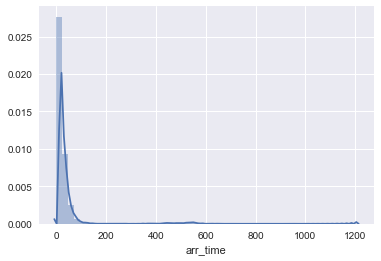

In [27]:
sns.distplot(temp);

## inter arrival for ATL(in terms of minutes)

In [28]:
temp = top5_temp.get_group("ATL")['arr_time'].diff().dropna().apply(lambda x: x/np.timedelta64(1, 'm'))

In [29]:
import seaborn as sns
sns.set(color_codes=True)

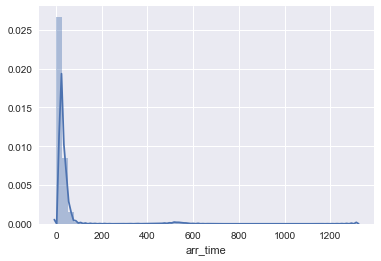

In [30]:
sns.distplot(temp);

## inter arrival for LAX(in terms of minutes)

In [31]:
temp = top5_temp.get_group("LAX")['arr_time'].diff().dropna().apply(lambda x: x/np.timedelta64(1, 'm'))

In [32]:
import seaborn as sns
sns.set(color_codes=True)

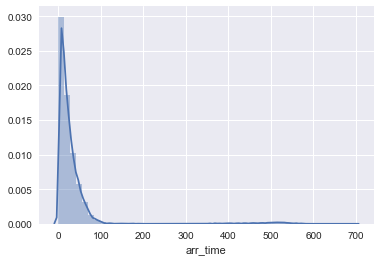

In [33]:
sns.distplot(temp);

## inter arrival for BOS(in terms of minutes)

In [34]:
temp = top5_temp.get_group("BOS")['arr_time'].diff().dropna().apply(lambda x: x/np.timedelta64(1, 'm'))

In [35]:
import seaborn as sns
sns.set(color_codes=True)

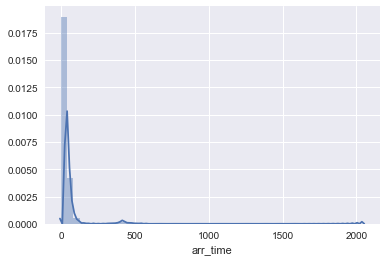

In [36]:
sns.distplot(temp);

## inter arrival for MCO(in terms of minutes)

In [37]:
temp = top5_temp.get_group("MCO")['arr_time'].diff().dropna().apply(lambda x: x/np.timedelta64(1, 'm'))

In [38]:
import seaborn as sns
sns.set(color_codes=True)

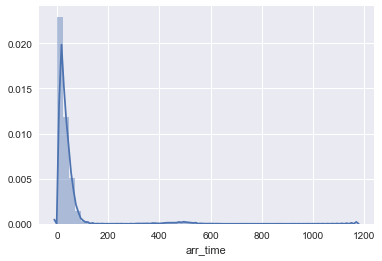

In [39]:
sns.distplot(temp);